## Random Forest Regression
#### Resources: https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import pandas as pd
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine #, func
from sqlalchemy.orm import Session
from sqlalchemy import text

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.inspection import permutation_importance
#import shap

warnings.filterwarnings('ignore')

In [3]:
#Read data and create dataframe

#filtered_df = pd.read_csv("Resources/filtered_df.csv")
#filtered_df

# Create a SQLite database engine
#engine = create_engine('sqlite:///filtered_df.sqlite')

# reflect an existing database into a new model
##Base=automap_base()

# reflect the tables
#Base.prepare(autoload_with=engine)

# Write DataFrame to SQLite database
#filtered_df.to_sql('realtor_filtered', con=engine, if_exists='replace', index=False)

# Confirm the data has been written by querying the database
#query = "SELECT * FROM realtor_filtered;"  # Example query
#with engine.connect() as conn:
    #result = conn.execute(text(query))

In [4]:
#df = result
#df = pd.DataFrame(df)
#df

In [5]:
df = pd.read_csv('drive/My Drive/clean_realestate_data.csv')

In [6]:
# reorder the columns
df = df[['bed', 'bath', 'acre_lot','zip_code','house_size', 'price']]
df

,bed,bath,acre_lot,zip_code,house_size,price
0,3.0,3.0,0.45,1001.0,2314.0,525000.0
1,3.0,2.0,0.36,1001.0,1276.0,289900.0
2,3.0,2.0,0.46,1001.0,1476.0,384900.0
3,3.0,2.0,1.76,1001.0,1968.0,199999.0
4,4.0,2.0,2.00,1002.0,1607.0,419000.0
...,...,...,...,...,...,...
1086258,4.0,2.0,0.33,99354.0,3600.0,359900.0
1086259,3.0,2.0,0.10,99354.0,1616.0,350000.0
1086260,6.0,3.0,0.50,99354.0,3200.0,440000.0
1086261,2.0,1.0,0.09,99354.0,933.0,179900.0


In [7]:
df=df[(df['price'] < 1200000) & (df['bed'] < 6) & (df['bath'] < 6) & (df['acre_lot'] < 0.5) & (df['house_size'] < 4000)]
df

,bed,bath,acre_lot,zip_code,house_size,price
0,3.0,3.0,0.45,1001.0,2314.0,525000.0
1,3.0,2.0,0.36,1001.0,1276.0,289900.0
2,3.0,2.0,0.46,1001.0,1476.0,384900.0
8,3.0,2.0,0.16,1002.0,1280.0,275000.0
9,4.0,2.0,0.49,1002.0,1814.0,415000.0
...,...,...,...,...,...,...
1086257,4.0,2.0,0.20,99354.0,2780.0,339900.0
1086258,4.0,2.0,0.33,99354.0,3600.0,359900.0
1086259,3.0,2.0,0.10,99354.0,1616.0,350000.0
1086261,2.0,1.0,0.09,99354.0,933.0,179900.0


In [8]:
# Set the features and the target
X = df.iloc[:,0:5]
y = df.iloc[:,5]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774036 entries, 0 to 1086262
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         774036 non-null  float64
 1   bath        774036 non-null  float64
 2   acre_lot    774036 non-null  float64
 3   zip_code    774036 non-null  float64
 4   house_size  774036 non-null  float64
 5   price       774036 non-null  float64
dtypes: float64(6)
memory usage: 41.3 MB


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [34]:
X_train

,bed,bath,acre_lot,zip_code,house_size
645492,3.0,3.0,0.16,30907.0,1764.0
235378,2.0,1.0,0.10,48912.0,938.0
997673,4.0,3.0,0.17,91303.0,2000.0
109482,4.0,3.0,0.46,30017.0,1992.0
210749,3.0,3.0,0.14,43207.0,1632.0
...,...,...,...,...,...
377774,3.0,2.0,0.16,85122.0,1679.0
539956,3.0,3.0,0.27,17019.0,1925.0
204453,2.0,2.0,0.17,41014.0,1024.0
938974,4.0,3.0,0.35,87701.0,3557.0


In [47]:
# define and fit the model
regressor = RandomForestRegressor(n_estimators=200, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=0)

In [48]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Access the Out of Bag Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Make predictions
predictions = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Determine the R-Squared Value
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.8549208768719518
Mean Squared Error: 7582125236.853148
Mean Absolute Error: 56432.47502493444
R-squared: 0.8562840368895325


In [49]:
predictions = regressor.predict(X_train)
# Evaluate the model
mse = mean_squared_error(y_train, predictions)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_train, predictions)
print(f'Mean Absolute Error: {mae}')

# Determine the R-Squared Value
r2 = r2_score(y_train, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 1082086956.7599773
Mean Absolute Error: 21363.749836922994
R-squared: 0.9796444766480348


TRIALS BEFORE REMOVING EXTREME OUTLIERS

------

n_est: 100

train: 0.4

mse_test: 517175056698.58264

r2_test: 0.5903777874542095

mse_train: 364527764134.73004

r2_train: 0.7744154139625137

-------

n_est: 500

train: 0.4

mse_test: 518397715464.91455

r2_test: 0.5894093954512185

mse_train: 358797459988.6169

r2_train: 0.7779615589090809

-------

n_est: 340

train: 0.6

mse_test: 411034916516.0135

r2_test: 0.6379097076542366

mse_train: 269378879350.81473

r2_train: 0.8298378273749727

-------

n_est:350

train: 0.6

mse_test: 411034916516.0135

r2_test: 0.6379097076542366

mse_train: 269068721216.60507

r2_train: 0.8299705807845871

-------

n_est: 500

train: 0.6

Mse_test: 410858147213.68585

r2_test: 0.6380654278760127

mse_train: 268783455077.84958

r2_train: 0.830213947017929

-------

n_est: 550

train: 0.5

mse_test: 499789863426.7387

r2_test: 0.6010658417982062

mse_train: 303998753078.92816

r2_train: 0.80450334629304

-------

n_est: 550

train: 0.6

mse_test: 411475158728.96356

r2_test: 0.6375218879698623

mse_train: 269291156834.64825

r2_train: 0.8298932402342696

-------

n_est: 600

train: 0.6

mse_test: 411489947530.44385

r2_test: 0.6375088601679987

mse_train: 268963080780.37296

r2_train: 0.8301004804392784

-------

n_est: 650

train: 0.6

mse_test: 411513650268.19556

r2_test: 0.6374879798707367

mse_train: 268388187763.01584

r2_train: 0.8304636308284115

-------
n_est: 500

train: 0.9

-------

n_est: 50

train: 0.9

mse_test: 475306988752.53204

r2_test: 0.6517307708931859

mse_train: 197146109078.87912

r2_train: 0.8600072890498746



TRIALS AFTER REMOVING EXTREME OUTLIERS

------

n_est: 50

train: 0.9

mse_test: 7675207308.205676

r2_test: 0.85451970576668

mse_train: 1150758601.7986608

r2_train: 0.9783526698616484

------

n_est: 300

train: 0.6

mse_test: 8360670855.602311

r2_test: 0.8422854897028121

mse_train: 1174031320.7306104

r2_train: 0.9779281199986828

------

n_est: 100

train: 0.6

mse_test: 8431041679.405048

r2_test: 0.8409580244542764

mse_train: 1211714303.8201554

r2_train: 0.9772196769902572

------

n_est: 60

train: 0.6

mse_test: 8500017253.4987955

r2_train: 0.8396568789985414

mse_train: 1247683665.2708862

mse_train: 0.9765434502017161

------

n_est: 55

train: 0.9

mse_test: 7657520775.533022

r2_test: 0.8548549464805606

mse_train: 1142032733.3956811

r2_train: 0.9785168152816938

------

n_est: 65

train: 0.9

mse_test: 7638893289.538384

r2_test: 0.855208022564959

mse_train: 1128430684.0984094

r2_train: 0.9787726882781987

------

n_est: 100

train: 0.9

mse_test: 7602820351.3734045

r2_test: 0.8558917697847235

mse_train: 1103833795.3794835

r2_train: 0.9792353891171434

------

n_est: 200

train: 0.9

mse_test: 7582125236.853148

r2_test: 0.8562840368895325

mse_train: 1082086956.7599773

r2_train: 0.9796444766480348



In [53]:
regressor.feature_importances_

array([0.0156832 , 0.0535493 , 0.05595678, 0.60908012, 0.26573061])

Text(0.5, 0, 'Random Forest Feature Importance')

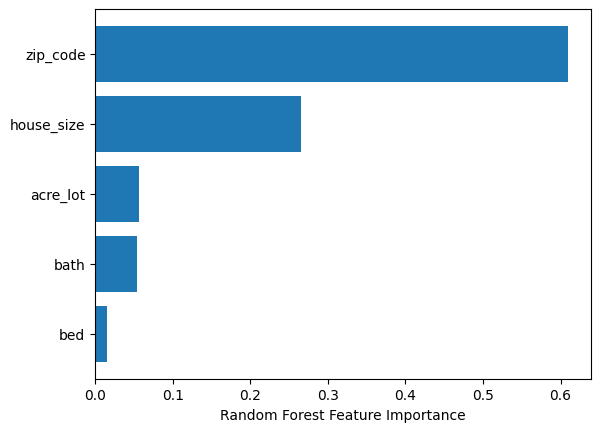

In [54]:
import matplotlib.pyplot as plt
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

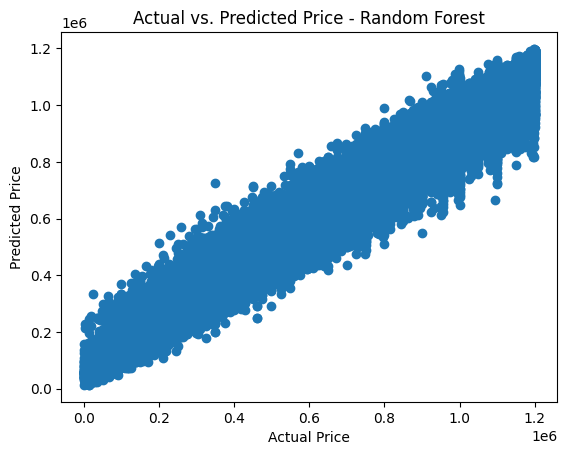

In [52]:
plt.scatter(y_train, predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price - Random Forest')
plt.show()